In [1]:
# kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files read-only "../input/"

# write up to 20GB to current directory (/kaggle/working/)
# write temporary files to /tmp/

# Train Model to Play DTTS

## Install Tensorforce

In [2]:
!pip install tensorforce > /dev/null 2>&1

## gdown

In [3]:

!pip install gdown > /dev/null 2>&1

# url = "https://drive.google.com/drive/folders/1P5aco9OBs8WB-a_Fnn0pZT0LY7BI3Vh3"
# url = "https://drive.google.com/drive/folders/1iheVndbURXwm3nK5VUqa5Bo5y0PgIyJG"
# url = "https://drive.google.com/drive/folders/1UC9YP5GTrG6eduethW5cq4J2pfe7ZH1T"
# url = "https://drive.google.com/drive/folders/1xUGM_z7jgsVSnqZ_4PGdIUJicrvQ3vP0"
# url = "https://drive.google.com/drive/folders/1cv2sVS3ofAt4jebrfir-1uhkIU69Yx71"
# url = "https://drive.google.com/drive/folders/16FFDPqkooQFBZFRZ402lIjzEhJDOwCNx"
url = "https://drive.google.com/drive/folders/1h11VYf2rpq4yK2bjbVUI0baIfptQjVE7"
save_dir = "model"
# save_to = save_dir + "/sim_v81_ddqn_m200k_b32_h3_d97_e0_vn01_s10k_v67cont"
# save_to = save_dir + "/sim_v82_ddqn_m200k_b256_h3_d97_e0_vn01_s10k_v69cont"
# save_to = save_dir + "/sim_v85_ddqn_m200k_b256_h3_d97_e0_vn01_lr00032_v69v82"
# save_to = save_dir + "/sim_v95_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_v69v82v85"
# save_to = save_dir + "/sim_v98_ddqn_m200k_b256_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85"
save_to = save_dir + "/sim2_v05_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85v98"
!mkdir $save_dir

import gdown
gdown.download_folder(url, output=save_to)
last_agent_path = save_to


Retrieving folder list


Processing file 18Po7s1ltwVPQl1nTQ6KU_34OotCci2PZ agent-18780.data-00000-of-00001
Processing file 1mAAaVzFYlIfP_wyFZbtDUSu_mOVMgzD8 agent-18780.index
Processing file 1lvIxHFyHQ1353rmXg9enchKejf9y1uBi agent-18780.npz
Processing file 1Mb2Gn_MISLyc8JsaHmQ5PbWx1R4a6f6u agent.json
Processing file 1ZFXlfxWkTyxBx9MpRQ-3KjcDmSKg2NWW checkpoint
Retrieving folder 11a3CYLtXld85RRQyVlbdenj1NdJbBEnN tf
Retrieving folder 1haHhDMrXqYN000fp15kjSvRLi8cxf2CZ assets
Processing file 1QzgfSwg4sflMtYKl6SzCQlbZMeVPA0mP keras_metadata.pb
Processing file 1jQcsK3woLs_3NgnOx6fNP8qEWMnqJkMA saved_model.pb
Retrieving folder 1yRx-Peh60xzPnlFtgjf8_IBPC1W599bl variables
Processing file 1vLkbg6T2SIoOSEkcMYedtkhLC4mh_m2L variables.data-00000-of-00001
Processing file 1bhEq76ywfwSGW59qDsTsVkUPFQzuC9y8 variables.index
Retrieving folder 1FFjPEbtMtZ5UwhZAyya3k1ZIgTmNI-2a tfjs
Processing file 1NuSJcvi9HnBmFl5CeWbZG96o76Hcli8d group1-shard1of1.bin
Processing file 1rn5mf1g_3MZ4HwQS2HzT1r-vbnesQFF0 model.json
Building directory

Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=18Po7s1ltwVPQl1nTQ6KU_34OotCci2PZ
To: /kaggle/working/model/sim2_v05_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85v98/agent-18780.data-00000-of-00001
100%|██████████| 20.5M/20.5M [00:00<00:00, 51.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mAAaVzFYlIfP_wyFZbtDUSu_mOVMgzD8
To: /kaggle/working/model/sim2_v05_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85v98/agent-18780.index
100%|██████████| 4.23k/4.23k [00:00<00:00, 6.42MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lvIxHFyHQ1353rmXg9enchKejf9y1uBi
To: /kaggle/working/model/sim2_v05_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85v98/agent-18780.npz
100%|██████████| 20.5M/20.5M [00:00<00:00, 72.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Mb2Gn_MISLyc8JsaHmQ5PbWx1R4a6f6u
To: /kaggle/working/model/sim2_v05_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85v98/a

In [4]:
# change some hyperparam
"""
import json

agent_json = last_agent_path + "/agent.json"
with open(agent_json) as file:
    agent_config = json.load(file)

agent_config["batch_size"] = 512
# agent_config["batch_size"] = 1024
# agent_config["learning_rate"] = 0.00032
# agent_config["learning_rate"] = 0.0001
# agent_config["learning_rate"] = 0.00005
# agent_config["discount"] = 0.99
# agent_config["discount"] = 0.965
# agent_config["target_sync_frequency"] = 500
# agent_config["target_sync_frequency"] = 40

with open(agent_json, "w") as file:
    json.dump(agent_config, file)
print("agent config changed.")
"""

'\nimport json\n\nagent_json = last_agent_path + "/agent.json"\nwith open(agent_json) as file:\n    agent_config = json.load(file)\n\nagent_config["batch_size"] = 512\n# agent_config["batch_size"] = 1024\n# agent_config["learning_rate"] = 0.00032\n# agent_config["learning_rate"] = 0.0001\n# agent_config["learning_rate"] = 0.00005\n# agent_config["discount"] = 0.99\n# agent_config["discount"] = 0.965\n# agent_config["target_sync_frequency"] = 500\n# agent_config["target_sync_frequency"] = 40\n\nwith open(agent_json, "w") as file:\n    json.dump(agent_config, file)\nprint("agent config changed.")\n'

# Environment

In [5]:
import random

import requests
import numpy as np

class DttsSimulator:
    def __init__(self):
        self.flyVelocity = -20
        self.velocityX = 12
        self.gravity = 54
        # self.initialSpikeCount = 3
        # self.addSpikePer = 7
        # self.initialSpikeCount = 11  # !!!
        self.initialSpikeCount = 9  # !!!
        self.addSpikePer = 1000  # !!!
        self.scoreSpeedAdd = 0.008
        # self.scoreSpeedAdd = 0  # !!!
        charSize = 1.2 * 2.4
        self.charTopBound = 1.5
        self.charBottomBound = 27.5
        self.charLeftBound = charSize / 2
        self.charRightBound = 20 - charSize / 2
        self.pineLeftBound = 4.8
        self.pineRightBound = 20-4.8
        
    def start(self):
        self.velocityY = self.flyVelocity
        self.charDir = 1
        self.playing = True
        self.charX = 10
        self.charY = 14.5
        self.charDir = 1
        self.spikeCount = self.initialSpikeCount
        self.score = 0
        self.speed = 1
        # self.speed = 1.12  # !!!
        self.pinePos = None
        self.pineDir = None
        self.hasSpike = [False] * 12

    def touchedSpike(self):
        for i in range(12):
            if self.hasSpike[i] and self.charY > i*2.4 + 0.1 and self.charY < i*2.4 + 2.5:
                self.playing = False
                return True
        return False
    def addSpike(self):
        self.hasSpike = [False] * 12
        for i in random.sample(list(range(12)), self.spikeCount):
            self.hasSpike[i] = True
    def addPine(self, d):
        self.pineDir = d
        self.pinePos = random.randint(1, 10)
    def touchedPine(self):
        if self.pineDir is None or self.pinePos is None:
            return False
        if ((self.pineDir < 0 and self.charX < self.pineLeftBound) or
            (self.pineDir > 0 and self.charX > self.pineRightBound)):
            if self.charY > self.pinePos*2.4+0.1 and self.charY < self.pinePos*2.4+2.5:
                return True
        return False

    def update(self, action):
        if action == 1:
            self.velocityY = self.flyVelocity
        # real_dt_ms = 5  # !!!
        # real_dt_ms = 50
        real_dt_ms = random.randint(30, 70)  # !!!
        dt = real_dt_ms / 1000 * self.speed
        self.charX += self.velocityX * dt * self.charDir
        self.charY += self.velocityY * dt + self.gravity * dt * dt / 2;
        self.velocityY += self.gravity * dt

        scored, pined = False, False
        if self.charX >= self.charRightBound:
            self.charX = self.charRightBound*2 - self.charX
            if not self.touchedSpike():
                self.charDir *= -1
                self.score += 1
                scored = True
                self.addSpike()
                if self.score % self.addSpikePer == 0 and self.spikeCount < 9:
                    self.spikeCount += 1
                if self.pineDir is None:
                    self.addPine(-1)
                self.speed += self.scoreSpeedAdd
        elif self.charX <= self.charLeftBound:
            self.charX = self.charLeftBound*2 - self.charX
            if not self.touchedSpike():
                self.charDir *= -1
                self.score += 1
                scored = True
                self.addSpike()
                if self.score % self.addSpikePer == 0 and self.spikeCount < 9:
                    self.spikeCount += 1
                self.speed += self.scoreSpeedAdd

        if self.touchedPine():
            pined = True
            self.addPine(-self.pineDir)
        if self.charY <= self.charTopBound:
            self.charY = self.charTopBound
            self.playing = False
        elif self.charY >= self.charBottomBound:
            self.charY = self.charBottomBound
            self.playing = False
        return scored, pined

    def state(self):
        def scale(value, min_value, max_value):
            return (value - min_value) / (max_value - min_value) * 2 - 1
        res = [
            scale(self.charX, self.charLeftBound, self.charRightBound),
            scale(self.charY, self.charTopBound, self.charBottomBound),
            self.charDir,
            scale(self.velocityY, self.flyVelocity, self.gravity),
            scale(self.pinePos or 0, 0, 10),
            self.pineDir or 0,
            # scale(self.score, 0, 100),  # !!!
        ]
        for i in self.hasSpike:
            res.append(1 if i else -1)
        return np.array(res)


In [6]:
from tensorforce.environments import Environment

class CustomEnvironment(Environment):

    def __init__(self):
        super().__init__()
        self.dtts = DttsSimulator()
        self.dtts.start()

    def states(self):
        return dict(type='float', shape=(18,))
        # return dict(type='float', shape=(19,))  # !!!
        # return dict(type='float', shape=(7,))
        # return {"1": dict(type='float', shape=(6,)), "2": dict(type='float', shape=(12, 1))}

    def actions(self):
        return dict(type='int', num_values=2)

    # Optional: should only be defined if environment has a natural fixed
    # maximum episode length; otherwise specify maximum number of training
    # timesteps via Environment.create(..., max_episode_timesteps=???)
    def max_episode_timesteps(self):
        return super().max_episode_timesteps()

    # Optional additional steps to close environment
    def close(self):
        super().close()
        self.dtts = DttsSimulator()
        self.dtts.start()

    def reset(self):
        self.dtts = DttsSimulator()
        self.dtts.start()
        return self.dtts.state()

    def execute(self, actions):
        if not self.dtts.playing:
            self.dtts.start()
        scored, pined = self.dtts.update(actions)
        state = self.dtts.state()
        terminal = not self.dtts.playing
        reward = int(scored) * 5 + int(pined) - (20 if terminal else 0)
        # reward = int(pined) - (20 if terminal else 0)  # !!!
        return state, terminal, reward


# Train

In [7]:
import os
import csv

from tqdm.notebook import tqdm
from tensorforce.agents import Agent
from tensorforce.execution import Runner
from tensorforce.core.networks import AutoNetwork

train_env = Environment.create(environment=CustomEnvironment())

# saver_config = dict(frequency=5, unit="episodes", max_checkpoints=200)
saver_config = dict(frequency=20, unit="episodes", max_checkpoints=500)
summarizer_config = dict(directory="log/tensorforce_tensorboard")

class ProgbarLogger:
    def __init__(self, total, print_new_line=False):
        self.print_new_line = print_new_line
        self.pbar = tqdm(total=total)

    def __call__(self, runner, parallel_idx):
        self.pbar.n = runner.episodes - 1
        desc = f"Iter {runner.episodes}/{runner.num_episodes} return: {runner.episode_return[0]}"
        self.pbar.desc = desc
        self.pbar.update()
        if self.print_new_line:
            print()

class CSVLogger:
    def __init__(self, filename, separator=","):
        self.filename = filename
        self.separator = separator

    def __call__(self, runner, parallel_idx):
        try:
            open(self.filename).close()
        except FileNotFoundError:
            header = ["episode", "return"]
            with open(self.filename, "w", newline="", encoding="utf-8-sig") as file:
                writer = csv.writer(file, delimiter=self.separator)
                writer.writerow(header)
        data = [runner.episodes, runner.episode_return[0]]
        with open(self.filename, "a", newline="", encoding="utf-8-sig") as file:
            writer = csv.writer(file, delimiter=self.separator)
            writer.writerow(data)

class Serialize:
    def __init__(self, functions):
        self.functions = functions

    def __call__(self, *args, **kwargs):
        for f in self.functions:
            f(*args, **kwargs)

# tensorforce
# agent = Agent.create(
#     agent='tensorforce', environment=train_env,
#     update=64,
#     optimizer=dict(optimizer='adam', learning_rate=1e-3),
#     objective='policy_gradient',
#     reward_estimation=dict(horizon=25, discount=0.97),
#     # optional
#     memory=1000,
#     exploration=0.1,
# )

# vpg/reinforce
# agent = Agent.create(
#     agent='vpg', environment=train_env,
#     max_episode_timesteps=25*40,
#     batch_size=25,
#     # optional
#     discount=0.97,
#     exploration=0.1,
# )

# ppo
# agent = Agent.create(
#     agent='ppo', environment=train_env,
#     batch_size=25,
#     # learning_rate=1e-3,
#     # max_episode_timesteps=25*40,
#     # optional
#     discount=0.97,
#     exploration=0.1,
# )

# trpo
# agent = Agent.create(
#     agent='trpo', environment=train_env,
#     max_episode_timesteps=25*40, batch_size=10
# )

# dqn
# agent = Agent.create(
#     agent='dqn', environment=train_env,
#     memory=100, batch_size=10
# )

# ddqn
# definitely working, just need more tuning
# i've seen it passed to level 10
# model_name = "v01_ddqn_mem5k_bs25_h25_d97_e10"
# model_name = "v02_ddqn_mem5k_bs25_h25_d97_e10decay97"
# model_name = "v03_ddqn_mem50k_bs250_h25_d97_e10decay97"
# model_name = "v04_ddqn_mem50k_bs250_h25_d97_e10decay97_upweight20"
# model_name = "v05_ddqn_mem5k_bs25_h25_d97_e10decay97_upweight20"
# model_name = "v06_ddqn_mem50k_bs25_h25_d97_e10decay995_upweight20"
# model_name = "v07_ddqn_mem50k_bs25_h25_d97_e10decay995"
# model_name = "v08_ddqn_mem50k_bs25_h25_d97_e10"
# model_name = "v09_ddqn_mem50k_bs25_h25_d97_e01"
# model_name = "v10_ddqn_mem50k_bs25_h25_d97_e10dec995_lr001dec998"

# model_name = "v11_ddqn_m50k_b25_h25_d97_e02"
# model_name = "v12_ddqn_m50k_b25_h25_d97_e005"
# model_name = "v13_ddqn_m50k_b250_h25_d97_e01"
# model_name = "v14_ddqn_m200k_b250_h25_d97_e01"
# model_name = "v15_ddqn_m200k_b1k_h25_d97_e01"
# model_name = "v16_ddqn_m50k_b25_h25_d97_e01_sf10"
# model_name = "v17_ddqn_m50k_b25_h25_d97_e01_sf40"
# model_name = "v18_ddqn_m50k_b25_h25_d97_e01_sf120"
# model_name = "v19_ddqn_m50k_b25_h25_d97_e01_vn01"
# model_name = "v20_ddqn_m50k_b25_h25_d97_e01_vn10"

# model_name = "v22_ddqn_m50k_bs25_h25_d97_e0"
# model_name = "v23_ddqn_m50k_bs25_h25_d97_e002"
# model_name = "v24_ddqn_m50k_bs25_h25_d97_e007"
# model_name = "v25_ddqn_m50k_bs25_h25_d97_e01_sf60"
# model_name = "v26_ddqn_m50k_bs25_h25_d97_e01_sf80"
# model_name = "v27_ddqn_m50k_bs25_h25_d97_e005_sf40"
# model_name = "v28_ddqn_mem50k_bs25_h25_d97_e0_vn01"
# model_name = "v29_ddqn_mem50k_bs25_h25_d97_e01_vn003"
# model_name = "v30_ddqn_mem50k_bs25_h25_d97_e005_vn003"
# model_name = "v31_ddqn_mem50k_bs25_h25_d97_e005_sf40_vn003"

# model_name = "v61_ddqn_m50k_b32_h3_d99_e0_vn50_lr0001_net256x1_sf500_start10k"
# model_name = "v61_ddqn_b32_h3_d99_vn50_lr0001_net256_sf500_su10k"
# model_name = "sim_v58_ddqn_m50k_b32_h3_d97_e0_vn01"

# model_name = "sim_v66_ddqn_m50k_b32_h3_d97_e0_vn01_s10k"
# model_name = "sim_v67_ddqn_m200k_b32_h3_d97_e0_vn01_s10k"
# model_name = "sim_v68_ddqn_m50k_b256_h3_d97_e0_vn01_s10k"
# model_name = "sim_v69_ddqn_m200k_b256_h3_d97_e0_vn01_s10k"
# model_name = "sim_v70_ddqn_m50k_b32_h1_d97_e0_vn01_s10k"
# model_name = "sim_v71_ddqn_m50k_b32_h5_d97_e0_vn01_s10k"
# model_name = "sim_v72_ddqn_m50k_b32_h3_d97_e0_vn01_s10k_lr0001"
# model_name = "sim_v73_ddqn_m50k_b32_h3_d97_e0_vn01_s10k_lr0005d9997"
# model_name = "sim_v74_ddqn_m50k_b32_h3_d97_e0_vn01_s10k_l2reg01"
# model_name = "sim_v75_ddqn_m200k_b256_h3_d97_e0_vn01_s10k_l2reg01_lr0005d9997"

# model_name = "sim_v76_ddqn_m500k_b256_h3_d97_e0_vn01_s10k"
# model_name = "sim_v77_ddqn_m200k_b256_h3_d97_e0_vn01"
# model_name = "sim_v78_ddqn_m200k_b32_h2_d97_e0_vn01_s10k"
# model_name = "sim_v79_ddqn_m200k_b32_h4_d97_e0_vn01_s10k"
# model_name = "sim_v80_ddqn_m200k_b32_h3_d97_e0_vn01_s10k_env5ms"
# model_name = "sim_v81_ddqn_m200k_b32_h3_d97_e0_vn01_s10k_v67cont"
# model_name = "sim_v82_ddqn_m200k_b256_h3_d97_e0_vn01_s10k_v69cont"

# model_name = "sim_v83_ddqn_m200k_b512_h3_d97_e0_vn01_v69v82"
# model_name = "sim_v84_ddqn_m200k_b1k_h3_d97_e0_vn01_v69v82"
# model_name = "sim_v85_ddqn_m200k_b256_h3_d97_e0_vn01_lr00032_v69v82"
# model_name = "sim_v86_ddqn_m200k_b256_h3_d97_e0_vn01_lr0001_v69v82"
# model_name = "sim_v87_ddqn_m200k_b256_h3_d99_e0_vn01_v69v82"
# model_name = "sim_v88_ddqn_m200k_b256_h3_d97_e0_vn01_sf500_v69v82"
# model_name = "sim_v89_ddqn_m200k_b256_h3_d97_e0_vn01_sf40_v69v82"
# model_name = "sim_v90_ddqn_m200k_b256_h3_d97_e0_vn01_nospeed_v69v82"

# model_name = "sim_v91_ddqn_m200k_b256_h3_d97_e0_vn01_lr00032_v69v82v85"
# model_name = "sim_v92_ddqn_m200k_b256_h3_d97_e0_vn01_lr0001_v69v82v85"
# model_name = "sim_v93_ddqn_m200k_b256_h3_d97_e0_vn01_lr00005_v69v82v85"
# model_name = "sim_v94_ddqn_m200k_b256_h3_d965_e0_vn01_lr0001_v69v82v85"
# model_name = "sim_v95_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_v69v82v85"
# model_name = "sim_v96_ddqn_m200k_b256_h3_d97_e0_vn01_lr0001_sf40_v69v82v85"
# model_name = "sim_v97_ddqn_m200k_b256_h3_d97_e0_vn01_lr0001_single_v69v82v85"
# model_name = "sim_v98_ddqn_m200k_b256_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85"
# model_name = "sim_v99_ddqn_m200k_b256_h3_d97_e0_vn01_lr0001_speed112_v69v82v85"

# model_name = "sim2_v01_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_v69v82v85v95"
# model_name = "sim2_v02_ddqn_m200k_b512_h3_d97_e0_vn01_lr00005_v69v82v85v95"
# model_name = "sim2_v03_ddqn_m200k_b1k_h3_d97_e0_vn01_lr0001_v69v82v85v95"
# model_name = "sim2_v04_ddqn_m200k_b1k_h3_d97_e0_vn01_lr00005_v69v82v85v95"
# model_name = "sim2_v05_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85v98"
# model_name = "new_v01_ddqn_m200k_b256_h3_d97_e0_vn01_s10k"  # 5000ep
# model_name = "new_v02_ddqn_m200k_b256_h3_d97_e0_vn01_s10k"  # again 10000ep
# model_name = "new_v03_ddqn_m200k_b256_h3_d97_e0_vn01_s10k_rdt20"
# model_name = "new_v04_ddqn_m200k_b256_h3_d97_e0_vn01_s10k_single"
# model_name = "new_v05_ddqn_m200k_b256_h3_d97_e0_vn01_s10k_pine"
# model_name = "sim2_v06_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_v69v82v85v98v05"
# model_name = "sim2_v07_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_pine_v69v82v85v98v05"
model_name = "sim2_v08_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_single_v69v82v85v98v05"

model_save_dir = f"model/{model_name}"
# if os.path.exists(model_save_dir):
#     agent = Agent.load(directory=model_save_dir)
#     print("agent loaded")
if True:
# if False:
    agent = Agent.load(directory=last_agent_path)
    print("agent loaded")
else:
    agent = Agent.create(
        agent='ddqn',
        environment=train_env,
        saver=dict(directory=model_save_dir, **saver_config),
        summarizer=dict(filename=f"tb-{model_name}", **summarizer_config),
        # # required
#         memory=5000,
#         memory=50000,
        memory=200000,
#         memory=500000,
#         batch_size=25,
#         batch_size=32,
#         batch_size=250,
        batch_size=256,
#         batch_size=1000,
        # # optional
#         horizon=1,
#         horizon=2,
        horizon=3,
#         horizon=4,
#         horizon=5,
#         horizon=25,
        discount=0.97,
#         discount=0.99,
#         target_update_weight=0.2,
#         exploration=0.1,
#         exploration=0.02,
#         exploration=0.01,
#         exploration=0.007,
#         exploration=0.005,
#         exploration=0.002,
#         exploration=dict(type="exponential", unit="episodes", num_steps=1000, initial_value=0.1, decay_rate=0.97),
#         exploration=dict(type="exponential", unit="episodes", num_steps=1000, initial_value=0.1, decay_rate=0.995),
#         learning_rate=1e-4,
#         learning_rate=dict(type="exponential", unit="episodes", num_steps=1000, initial_value=1e-3, decay_rate=0.998),
#         learning_rate=dict(type="exponential", unit="episodes", num_steps=10000, initial_value=0.0005, decay_rate=0.9997),
#         target_sync_frequency=10,
#         target_sync_frequency=40,
#         target_sync_frequency=60,
#         target_sync_frequency=80,
#         target_sync_frequency=120,
#         target_sync_frequency=500,
        start_updating=10000,
        variable_noise=0.01,
#         variable_noise=0.1,
#         variable_noise=0.5,
#         l2_regularization=0.01,
        # network=AutoNetwork(depth=3),
        # network=[
        #     dict(name="dense0", type='dense', size=64, activation='tanh'),
        #     dict(name="dense1", type='dense', size=64, activation='tanh'),
        #     dict(name="dense2", type='dense', size=64, activation='tanh'),
        # ],
#         network=[
#             dict(name="dense0", type='dense', size=256, activation='tanh'),
#         ],
        # network=[
        #     dict(name="dense0", type='dense', size=64, activation='leaky-relu'),
        #     dict(name="dense1", type='dense', size=64, activation='leaky-relu'),
        #     dict(name="dense2", type='dense', size=64, activation='leaky-relu'),
        # ],
        # network=model,
    )

# dueling_dqn worth trying?
# agent = Agent.create(
#     agent='dueling_dqn', environment=train_env,
#     memory=100, batch_size=10
# )

# ac
# agent = Agent.create(
#     agent='ac', environment=train_env,
#     batch_size=10
# )

# a2c
# model_name = "a2c_bs25_h25_d97_e10_score1x5x20x"
# agent = Agent.create(
#     agent='a2c',
#     environment=train_env,
#     saver=dict(directory=f"model/{model_name}", **saver_config),
#     summarizer=dict(filename=f"tb-{model_name}", **summarizer_config),
#     batch_size=25,
#     # optional
#     horizon=25,
#     discount=0.97,
#     exploration=0.1,
# )

# print(agent.get_architecture())
runner = Runner(agent, environment=train_env)
# num_episodes = 40 # test
# num_episodes = 4000
# num_episodes = 5000
num_episodes = 10000
# input("Press ENTER to run...")
# time.sleep(5)
print("model name:", model_name)
print("Start training.")
runner.run(num_episodes=num_episodes, use_tqdm=False,
    callback=CSVLogger(f"train.{model_name}.log.csv"))
#     callback=Serialize([
#        ProgbarLogger(num_episodes), CSVLogger(f"train.{model_name}.log.csv")]))
# runner.close()
print("Finish training.")

# hyperparam to try:
# memory bigger ?
# warm-up ?
# batch size ?
# model sync count / update freq ?
# lr smaller ?
# discount ?
# exploration ?


agent loaded
model name: sim2_v08_ddqn_m200k_b512_h3_d97_e0_vn01_lr0001_rdt20_single_v69v82v85v98v05
Start training.
Finish training.


# Plot return

count    10000.000000
mean         2.022700
std         19.067484
min        -15.000000
25%        -10.000000
50%         -4.000000
75%         10.000000
max        156.000000
Name: return, dtype: float64


<AxesSubplot:>

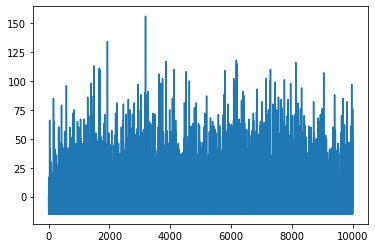

In [8]:
import pandas as pd

df = pd.read_csv(f"train.{model_name}.log.csv")
print(df["return"].describe())
df["return"].plot()

count    9501.000000
mean        2.135620
std         1.223231
min        -2.246000
25%         1.418000
50%         2.296000
75%         3.042000
max         4.578000
Name: return, dtype: float64


<AxesSubplot:>

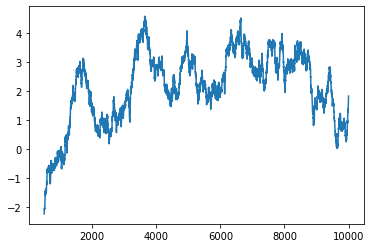

In [9]:
ma_window = 500
df_ma = (df["return"].rolling(ma_window).sum() / ma_window)
print(df_ma.describe())
df_ma.plot()

### Save

In [10]:
"""
import keras
from keras import layers as L

model = keras.Sequential([
    L.Input(18),
    L.Dense(64, activation="tanh"),
    L.Dense(64, activation="tanh"),
    L.Dense(2),
], name="mlp_input18_dense64relu2x_dense2")
model.summary()
print(model.input_shape, model.output_shape)
print("weigths:", [i.shape for i in model.get_weights()])
"""

'\nimport keras\nfrom keras import layers as L\n\nmodel = keras.Sequential([\n    L.Input(18),\n    L.Dense(64, activation="tanh"),\n    L.Dense(64, activation="tanh"),\n    L.Dense(2),\n], name="mlp_input18_dense64relu2x_dense2")\nmodel.summary()\nprint(model.input_shape, model.output_shape)\nprint("weigths:", [i.shape for i in model.get_weights()])\n'

In [11]:
# # convert to Keras SavedModel by building model then set weights because
# # agent.save(directory=f"model/tf-{model_name}", format='saved-model') would cause
# # AssertionError: Tried to export a function which references 'untracked' resource Tensor
"""
print(agent.get_architecture())
npz_path = agent.save(directory="model", format='numpy', append='episodes')
print(npz_path)
data = np.load(npz_path)
# print(data.files)

keys = [
    'policy/network/dense0/weights',
    'policy/network/dense0/bias',
    'policy/network/dense1/weights',
    'policy/network/dense1/bias',
    'policy/action_value/linear/weights',
    'policy/action_value/linear/bias',
]
model.set_weights([data[k] for k in keys])
model.save(f"model/tf")
"""

'\nprint(agent.get_architecture())\nnpz_path = agent.save(directory="model", format=\'numpy\', append=\'episodes\')\nprint(npz_path)\ndata = np.load(npz_path)\n# print(data.files)\n\nkeys = [\n    \'policy/network/dense0/weights\',\n    \'policy/network/dense0/bias\',\n    \'policy/network/dense1/weights\',\n    \'policy/network/dense1/bias\',\n    \'policy/action_value/linear/weights\',\n    \'policy/action_value/linear/bias\',\n]\nmodel.set_weights([data[k] for k in keys])\nmodel.save(f"model/tf")\n'